### Wind Analysis

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Processing_file: cleaned_benin-malanville.csv


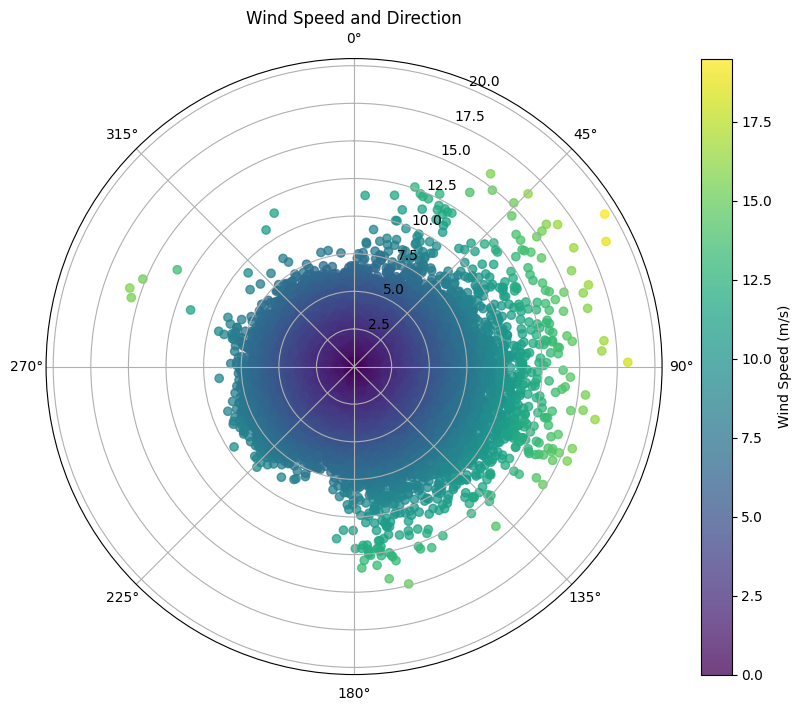

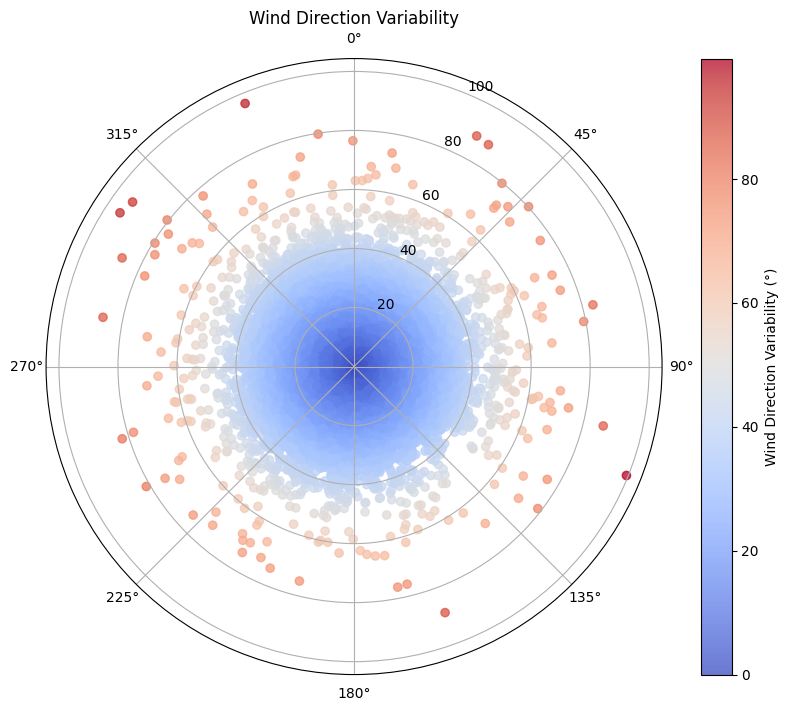

Processing_file: cleaned_sierraleone-bumbuna.csv


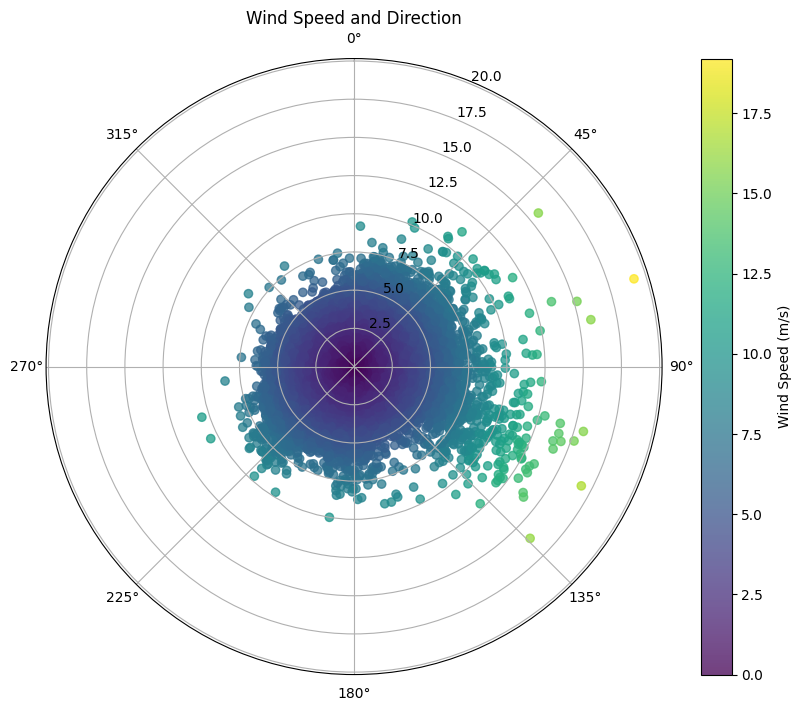

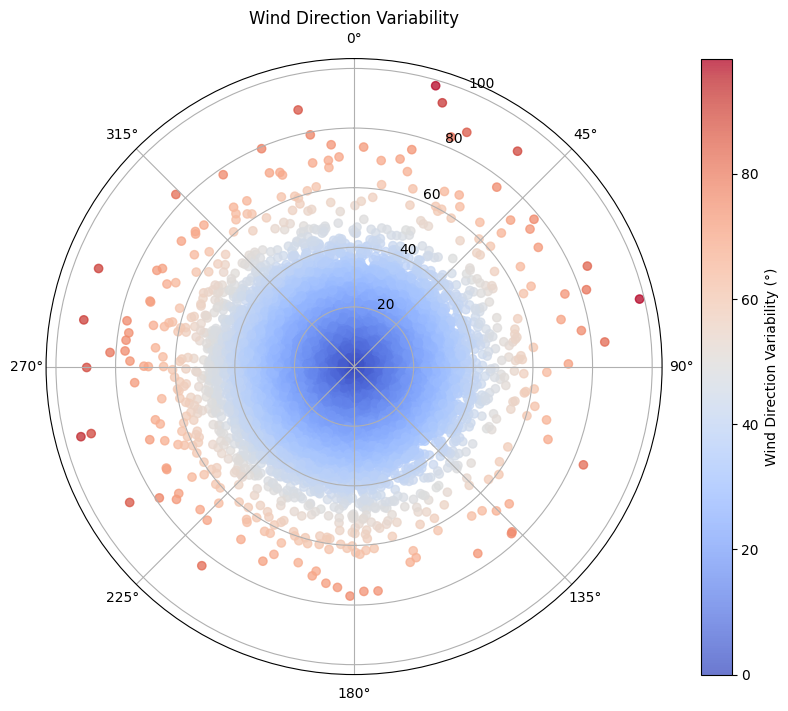

Processing_file: cleaned_togo-dapaong_qc.csv


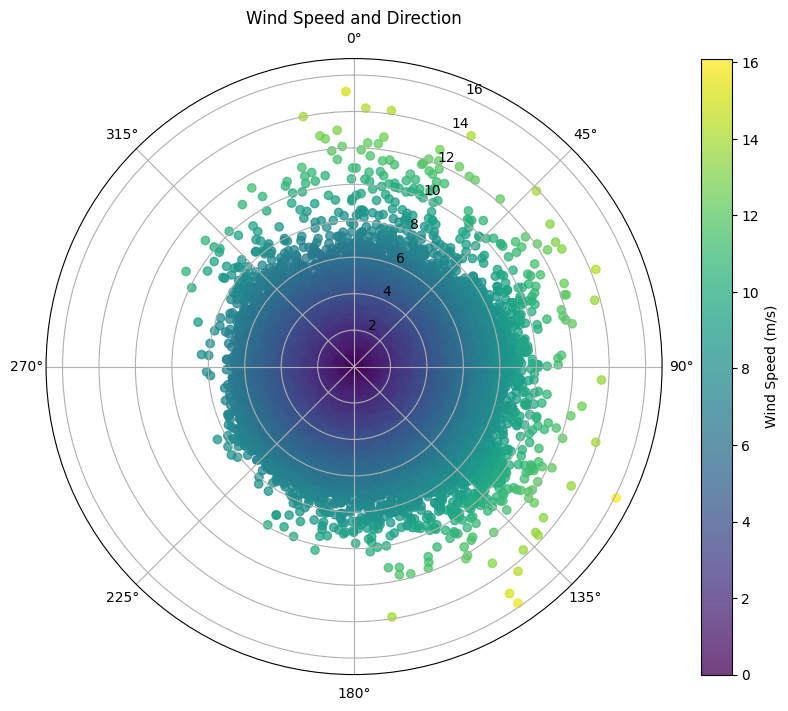

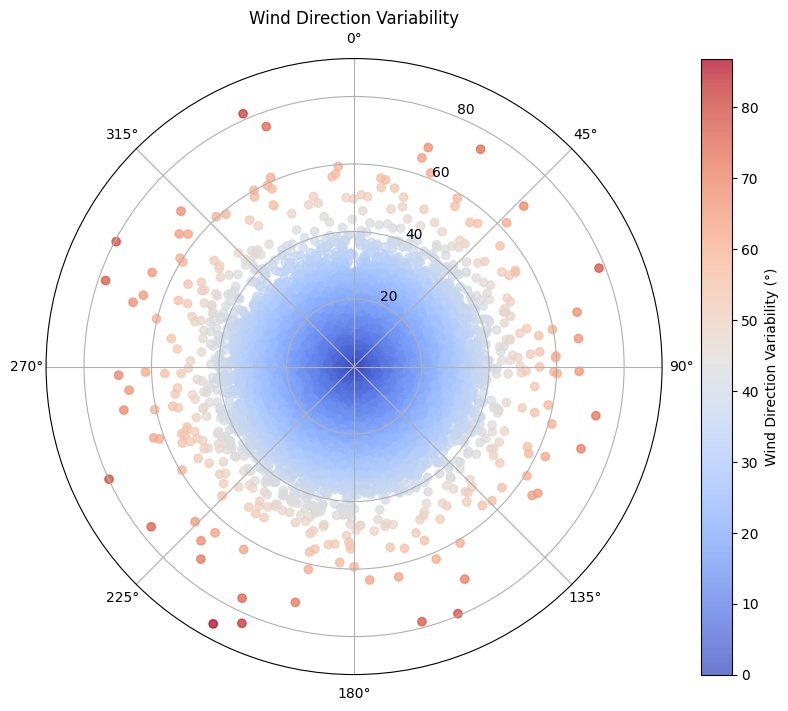

In [8]:
#load_data
class DataFolderProcessor:
    def __init__(self, folder_name='cleaned_data'):
        self.current_directory = os.getcwd()
        self.data_folder_path = os.path.join(self.current_directory, folder_name)
        self.csv_files = [f for f in os.listdir(self.data_folder_path) if f.endswith('.csv')]

    def process_file(self, csv_file):
        file_path = os.path.join(self.data_folder_path, csv_file)
        df = pd.read_csv(file_path)
        return df

# Create a polar plot for wind direction and speed
def polar_plot(df):
    # Convert wind direction from degrees to radians
    df['WD_rad'] = np.deg2rad(df['WD'])

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, projection='polar')
    sc = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', alpha=0.75)
    plt.colorbar(sc, label='Wind Speed (m/s)')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2.0)
    ax.set_title('Wind Speed and Direction')
    plt.show()

# Create a polar plot for wind direction variability
def polar_plot_variability(df):
    df['WDstdev_rad'] = np.deg2rad(df['WDstdev'])

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, projection='polar')
    sc = ax.scatter(df['WD_rad'], df['WDstdev'], c=df['WDstdev'], cmap='coolwarm', alpha=0.75)
    plt.colorbar(sc, label='Wind Direction Variability (°)')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2.0)
    ax.set_title('Wind Direction Variability')
    plt.show()

# Example usage
processor = DataFolderProcessor()
csv_files = processor.csv_files
for csv_file in csv_files:
    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
    df = processor.process_file(csv_file)  

    # Call the functions
    print(f'Processing_file: {csv_file}')
    polar_plot(df)
    polar_plot_variability(df)
